In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Flight_Booking.csv')
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [3]:
# Drop the column
df.drop(columns=['Unnamed: 0','flight'], inplace=True)

In [4]:
print("Shape of the dataset:",df.shape)
df.info()

Shape of the dataset: (300153, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   source_city       300153 non-null  object 
 2   departure_time    300153 non-null  object 
 3   stops             300153 non-null  object 
 4   arrival_time      300153 non-null  object 
 5   destination_city  300153 non-null  object 
 6   class             300153 non-null  object 
 7   duration          300153 non-null  float64
 8   days_left         300153 non-null  int64  
 9   price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 22.9+ MB


In [5]:
df.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


In [6]:
#Checking out the missing values
df.isnull().sum()

airline             0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

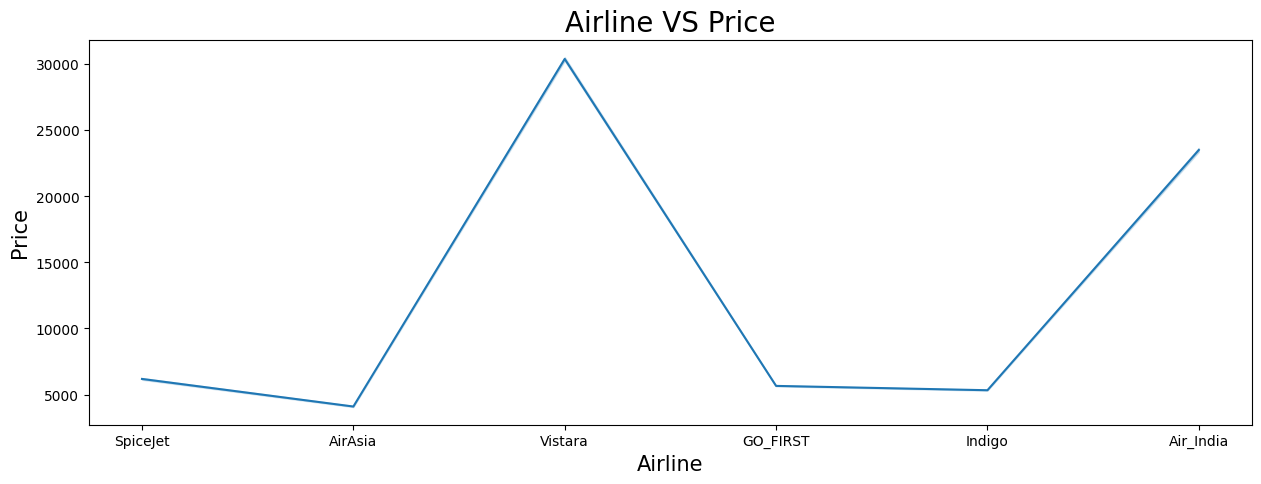

In [7]:
# Price variantion
plt.figure(figsize=(15,5))
sns.lineplot(x = df['airline'], y = df['price'])
plt.title('Airline VS Price',fontsize=20)
plt.xlabel('Airline',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

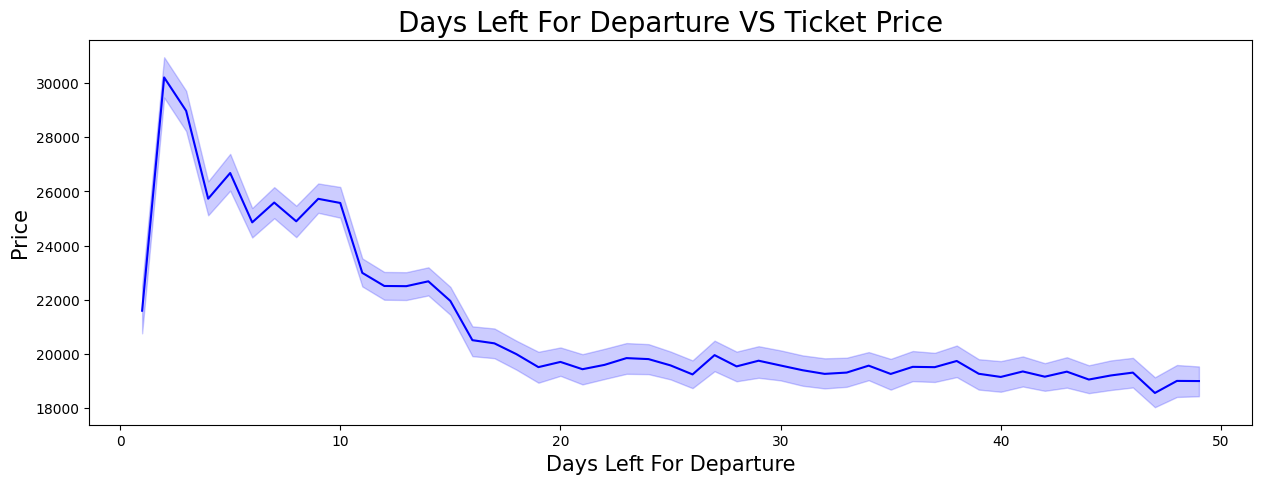

In [8]:
plt.figure(figsize=(15,5))
sns.lineplot(x = df['days_left'], y = df['price'],color = 'blue')
plt.title('Days Left For Departure VS Ticket Price',fontsize=20)
plt.xlabel('Days Left For Departure',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

The Price of the ticket increases as the days left for departure descreases

<Axes: xlabel='airline', ylabel='price'>

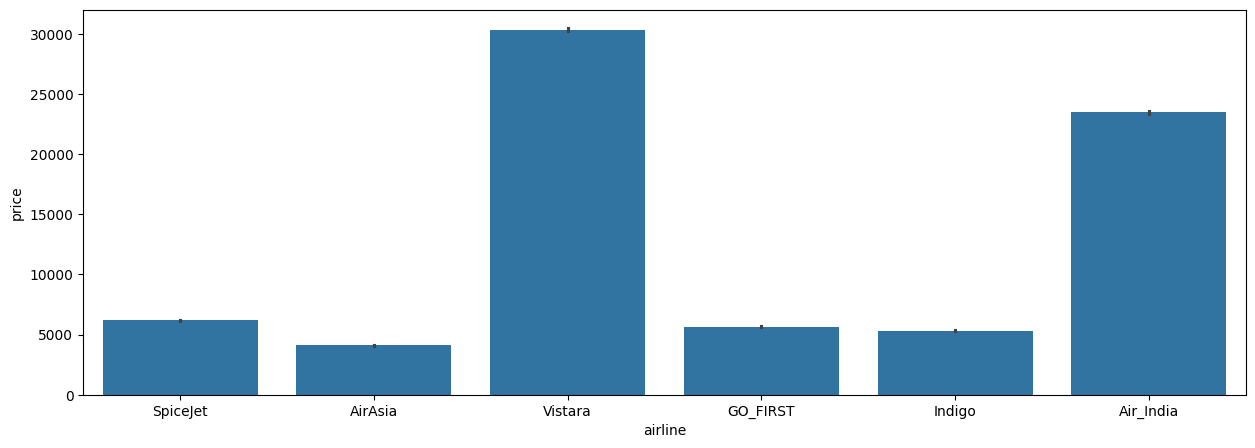

In [9]:
#Price range of all the flights
plt.figure(figsize=(15,5))
sns.barplot(x = df['airline'], y = df['price'])

<Axes: xlabel='class', ylabel='price'>

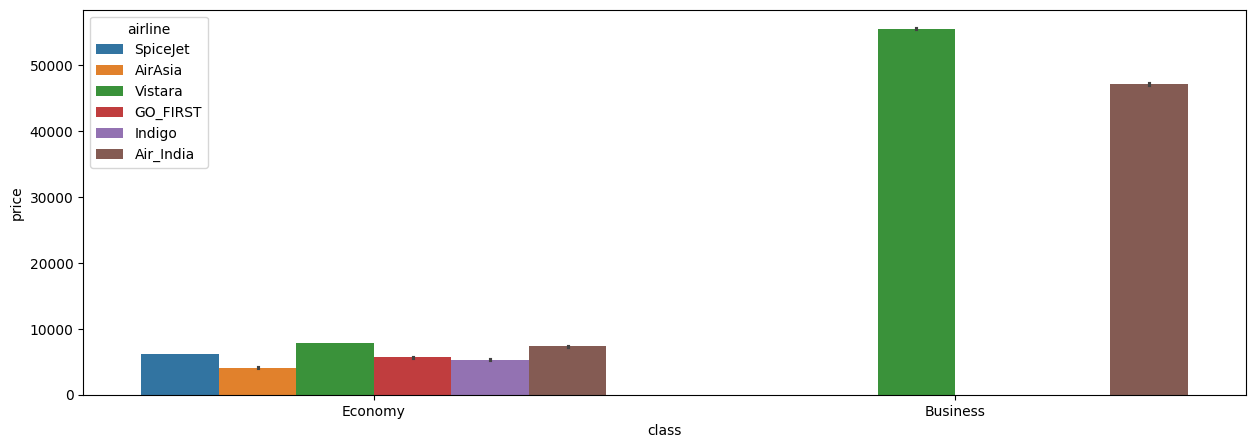

In [10]:
# Range of price of all the flights of Economy and Business class
plt.figure(figsize=(15,5))
sns.barplot(x = df['class'], y = df['price'],hue= df['airline'])

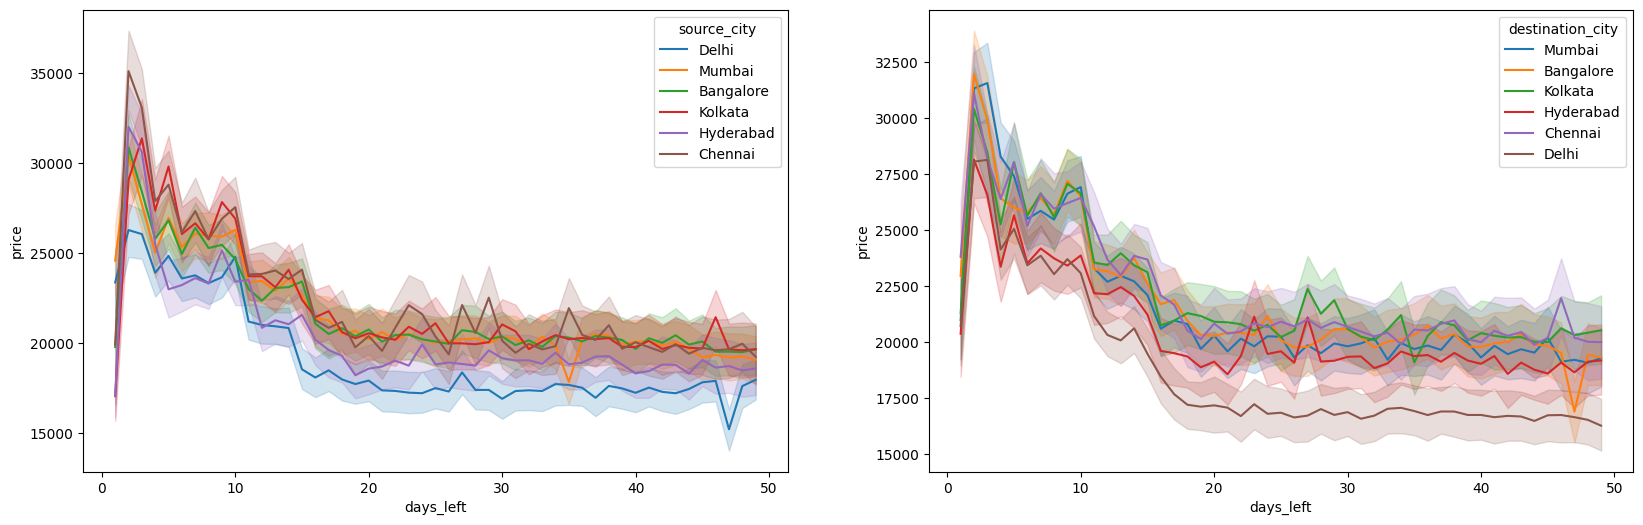

In [11]:
# Range of price of flights with source and destination city according to the days left

fig, ax = plt.subplots(1,2,figsize=(20,6))
sns.lineplot(data = df, x ='days_left', y = 'price', hue = 'source_city', ax = ax[0])
sns.lineplot(data = df, x ='days_left', y = 'price', hue = 'destination_city', ax = ax[1])
plt.show()

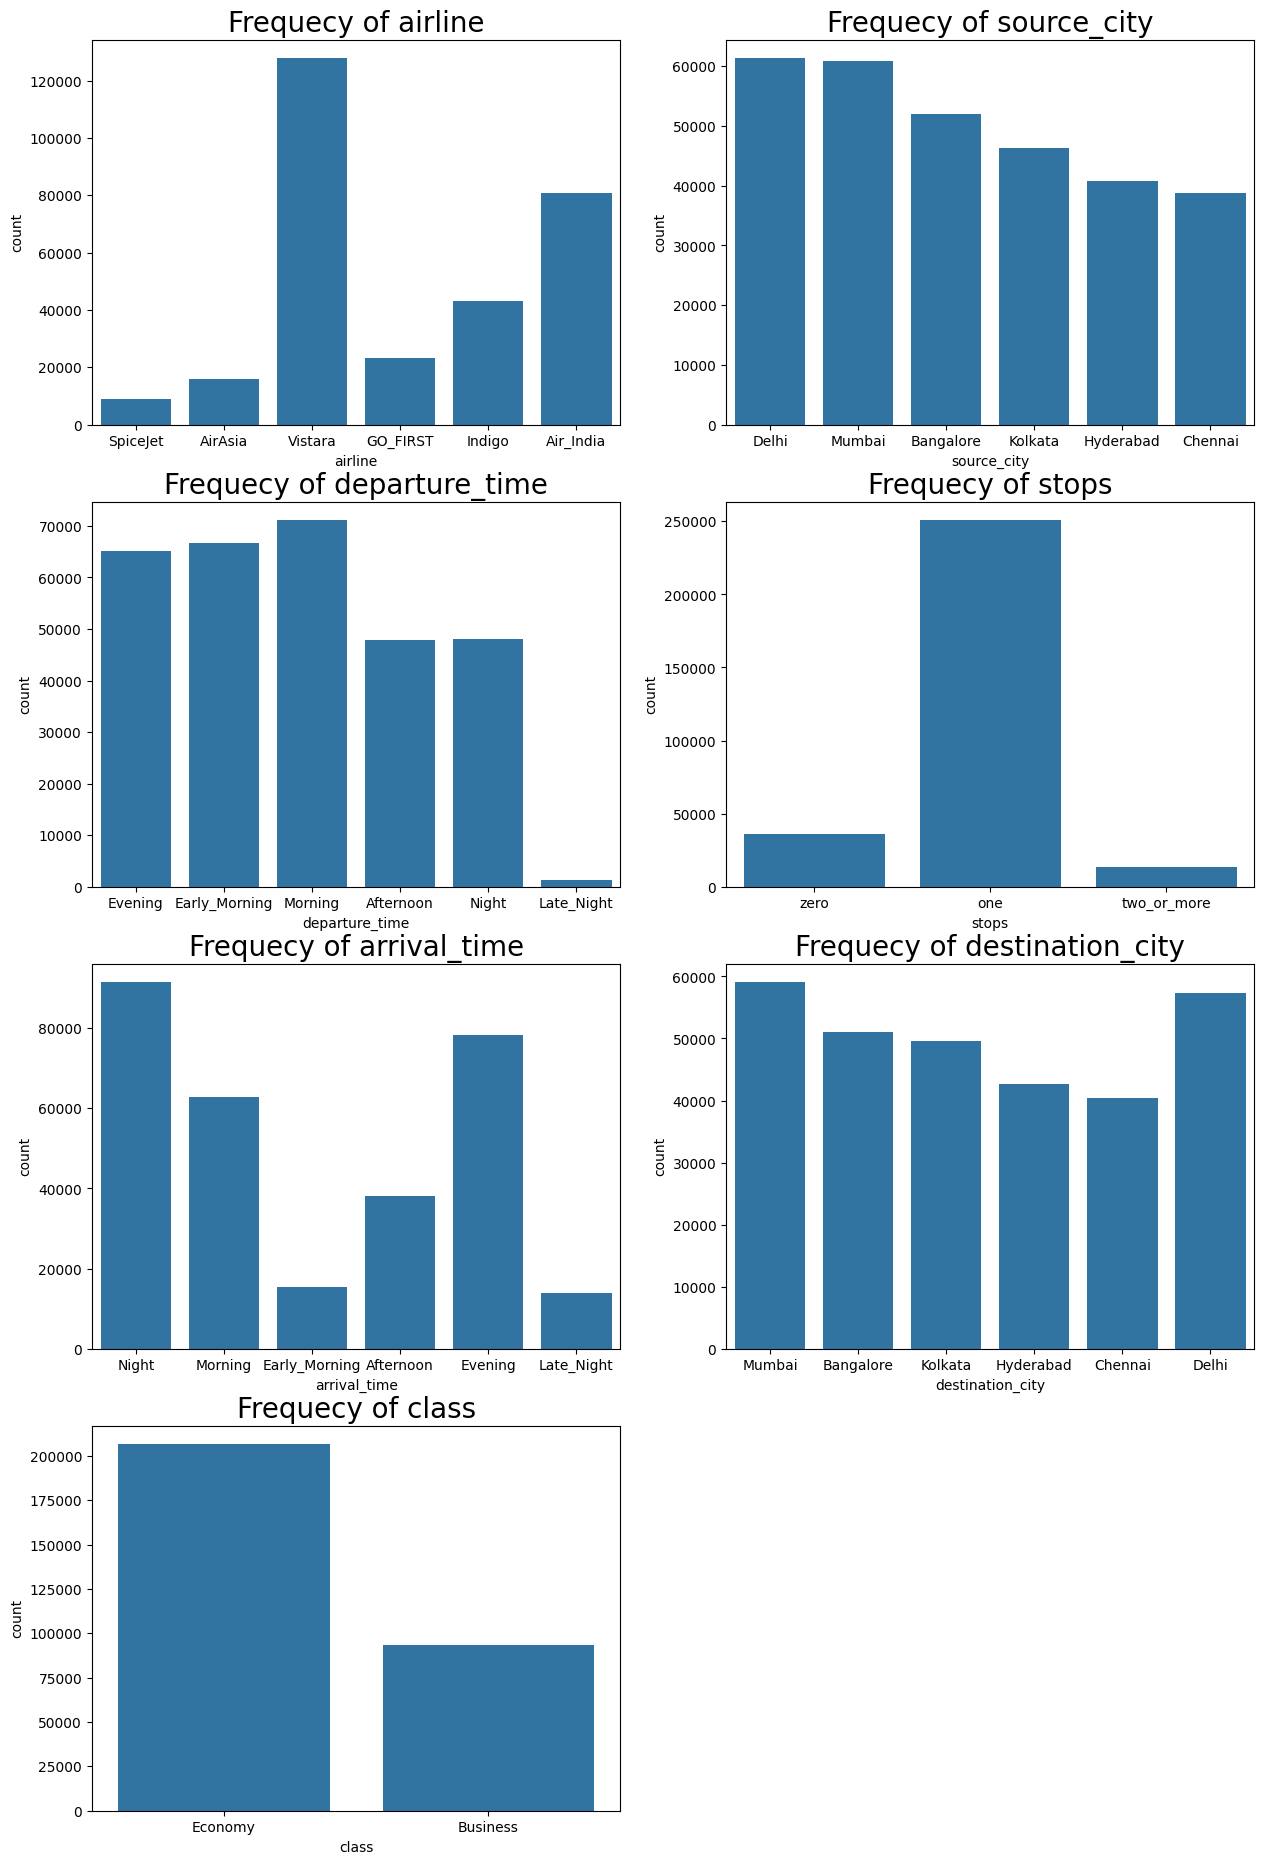

In [12]:
# Visualization of categorical features with countplot
columns_plot = ['airline','source_city',
                'departure_time','stops','arrival_time','destination_city','class']
plt.figure(figsize = (15,23))

for column_index,column  in enumerate(columns_plot):
    plt.subplot(4,2,column_index+1)
    sns.countplot(x=column,data = df)
    plt.title(f'Frequecy of {column}',fontsize=20)
plt.show()

# Label Encoding

In [13]:
# Performing One hot Encoding of categorical features of a dataframe
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for column in columns_plot:
    df[column] = le.fit_transform(df[column])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  int64  
 1   source_city       300153 non-null  int64  
 2   departure_time    300153 non-null  int64  
 3   stops             300153 non-null  int64  
 4   arrival_time      300153 non-null  int64  
 5   destination_city  300153 non-null  int64  
 6   class             300153 non-null  int64  
 7   duration          300153 non-null  float64
 8   days_left         300153 non-null  int64  
 9   price             300153 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 22.9 MB


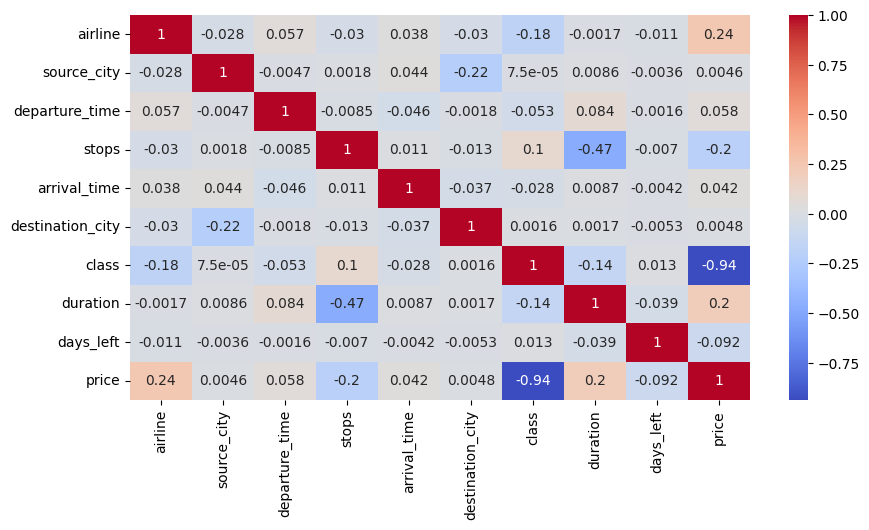

In [14]:
# Plotting the correlation graph to see the correlation between features and dependent variable.
plt.figure(figsize=(10,5))
numeric_df = df.select_dtypes(include=['number'])  # select only numeric columns
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.show()

# 📊 Correlation Heatmap Insights:

1. 'class' and 'price' have a strong negative correlation (-0.94)
   → Business class tickets are more expensive.

2. 'duration' and 'stops' show moderate negative correlation (-0.47)
   → More stops may reduce total duration.

3. 'airline' and 'price' have weak positive correlation (0.24)
   → Some airlines tend to have slightly higher prices.

4. 'days_left' and 'price' have very weak negative correlation (-0.09)
   → Tickets may get cheaper slightly with more days left, but effect is minimal.

# Feature Selection


In [15]:
# Selecting the features using VIF.
from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list = []
for col in df.columns:
    if ((df[col].dtype != 'object') & (col != 'price')) :
        col_list.append(col)

X = df[col_list]
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values,i)
                                             for i in range(len(X.columns))]
print(vif_data)

            feature       VIF
0           airline  3.393124
1       source_city  2.927766
2    departure_time  2.779427
3             stops  1.426614
4      arrival_time  3.684550
5  destination_city  2.885337
6             class  2.849370
7          duration  4.113876
8         days_left  3.976790


# Linear Regression

In [16]:
# Applying standardization and implementing Linear Regression Model to predict the price of a flight.
X = df.drop(columns = ['price'])
y = df['price']

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
diifference = pd.DataFrame(np.c_[y_test,y_pred], columns = ["Actual_value","Predicted_value"])
diifference

,Actual_value,Predicted_value
0,7366.0,4585.880510
1,64831.0,52842.077073
2,6195.0,7877.980184
3,60160.0,56120.138579
4,6578.0,6663.204177
...,...,...
60026,5026.0,5829.230618
60027,3001.0,539.222230
60028,6734.0,5848.965500
60029,5082.0,-1498.061918


In [18]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

print("Linear Regression")
print("R2 Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

Linear Regression
R2 Score: 0.904554350718816
MAE: 4624.994868017024
MSE: 49200540.29372198
RMSE: 7014.309680483318


In [19]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(x_train, y_train)
y_pred_dt = dt.predict(x_test)

print("Decision Tree")
print("R2 Score:", r2_score(y_test, y_pred_dt))
print("MAE:", mean_absolute_error(y_test, y_pred_dt))
print("MSE:", mean_squared_error(y_test, y_pred_dt))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_dt)))

Decision Tree
R2 Score: 0.9755144403717724
MAE: 1176.1345055054887
MSE: 12621871.946765006
RMSE: 3552.7273955040523


In [20]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)

print("Random Forest")
print("R2 Score:", r2_score(y_test, y_pred_rf))
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("MSE:", mean_squared_error(y_test, y_pred_rf))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))

Random Forest
R2 Score: 0.9849187251531402
MAE: 1091.5029600298444
MSE: 7774129.846376385
RMSE: 2788.212661612522


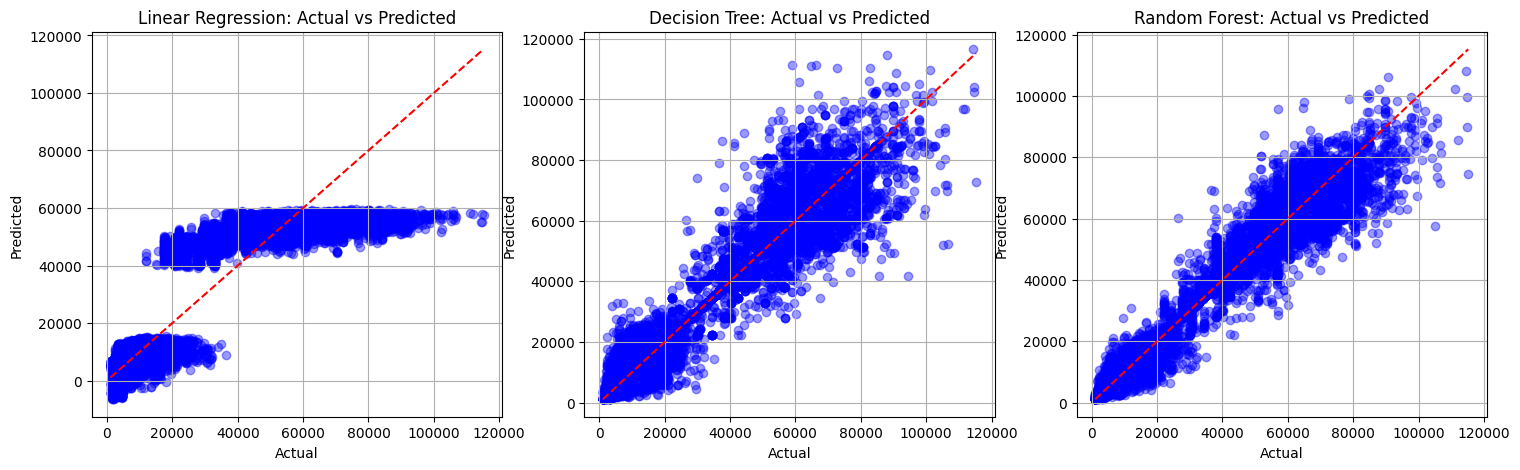

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

In [21]:
def plot_actual_vs_predicted(ax,y_test, y_pred, title):
    plt.figure(figsize=(6, 4))
    ax.scatter(y_test, y_pred, alpha=0.4, color='blue')
    ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    ax.set_xlabel("Actual")
    ax.set_ylabel("Predicted")
    ax.set_title(title)
    ax.grid(True)
    

# Plotting
# --- Creating the Subplots ---
fig, axes = plt.subplots(1, 3, figsize=(18, 5)) # 1 row, 3 columns. Adjust figsize as needed.

plot_actual_vs_predicted(axes[0],y_test, y_pred, "Linear Regression: Actual vs Predicted")
plot_actual_vs_predicted(axes[1],y_test, y_pred_dt, "Decision Tree: Actual vs Predicted")
plot_actual_vs_predicted(axes[2],y_test, y_pred_rf, "Random Forest: Actual vs Predicted")
plt.tight_layout()
plt.show()

This plot helps visualize how close the model’s predictions are to the actual values.

Ideal predictions lie on the red diagonal line.

Closer the points to the line, better the model performance.

Useful for comparing models and spotting underfitting or overfitting.


### 
🔍 Model Evaluation Summary

We compared three regression models based on R², MAE, MSE, and RMSE.

| Metric        | Linear Regression | Decision Tree       | Random Forest        |
|---------------|-------------------|----------------------|-----------------------|
| **R² Score**  | 0.905             | 0.975                | **0.985**             |
| **MAE**       | 4625              | 1176                 | **1091**            |
| **MSE**       | 49,200,540        | 12,621,872           | **7,772,325**         |
| **RMSE**      | 7014.3            | 3552.7               | **2788.2**            |

### ✅ Conclusion

The **Random Forest Regressor** performs the best among all three models. It achieves the **highest R² score** and the **lowest MAE, MSE, and RMSE**, indicating excellent predictive power and minimal errors.

This model is well-suited for complex and non-linear datasets, and it offers a great balance between bias and variance.
